# Numerical Integration II


[//]: # "_**Importance sampling; MCMC (Gibbs, Metropolis-H); GHK**_"


[//]: # "Here we introduce the method of Monte Carlo Integrations."


## Monte Carlo Integration

Let's consider a function $g(X)$ which is to be integrated in $[a,b]$. With some algebra, we can express the problem as

$$\begin{aligned}
I = \int_a^b g(x) dx = (b-a) \int_a^b g(x) \frac{1}{b-a} dx = (b-a) E[g(X)],
\end{aligned}$$

where $\frac{1}{b-a}$ may be regarded as the density function of a uniform distribution in $[a,b]$, and thus $\int_a^b g(x) \frac{1}{b-a} dx$ becomes the expected value of $g(X)$ *assuming* $X$ follows a uniform distribution in $[a,b]$.


Here we provide an intuitive explanation of the approach based on the one-dimensional integration problem. In the original problem, $I$ is the area under $g(x)$ between $[a,b]$ which does not bear the interpretation of expected values of random variables/functions. We then create a probability function for $X$ so that the integration may be expressed as the expected value of $g(X)$ (viz., $E[g(X)]$) multiplied by the "*volume*" $b-a$. The advantage of making the transformation is that the population mean, $E[g(x)]$, can then be numerically approximated by the sample average of $g(x_i)$, $x_i \in [a,b]$, based on the law of large numbers which is quite manageable. Furthermore, by making the probability function of $X$ to be a uniform distribution function, drawing random samples from $X$ is easy.

- To be more specific, we can define $p(x)=1/(b-a)$ as the density function of a uniform distribution for $x \in (a,b)$, and $I = \int_a^b [g(x)/p(x)] p(x)dx = (b-a) \int_a^b g(x) p(x) dx = (b-a) E[g(x)] $. The algebra looks similar to what we would do for **importance sampling** (will be introduced later), but we should refrain from that interpretation. It is because $p(x)$ in this case is a uniform distribution which does not put emphasis on particular ("importance") region of the domain and is not in the spirit of importance sampling.


In practice of Monte Carlo integration, for a given problem we often transform the domain from $[a,b]$ to $[0,1]$, via the change of variables, before applying the rule. This is particularly so for quasi-Monte Carlo integrations using low discrepancy sequence, as we will see soon. Doing so we have

$$\begin{aligned}
I = \int_a^b g(x) dx = \int_0^1 f(t) dt = (1-0) \int_0^1 f(t) \frac{1}{1-0} dt = E[f(t)].
\end{aligned}$$

Here, we need to find a transformation rule $x=\rho(t)$ such that $\rho^{-1}(b)=1$ and $\rho^{-1}(a)=0$. Then, $f(t) = g(\rho(t)) \rho'(t)$ where $\rho'(t)$ is the Jacobian. 

- As we will show below, if $a$ and $b$ are both finite and a suitable transformation function in this case is $x = a+(b-a)t$ to which the Jacobian is $(b-a)$.

Note that the *volume* of $(b-a)$ no longer shows, and the integration is literally the sample average of the *transformed* function $f(t)$. To sum up, we have

$$\begin{align}
 I = (b-a) E[g(X)] = E[f(t)],
\end{align}$$

where $X$ is assume to be uniformly distributed in $[b, a]$ and $t$ is uniformly distributed in $[0,1]$.

> We sometimes see statements which equate the Monte Carlo integration to the sample average of the function. It is an oversimplified statement. The statement is correct with respect to $f(t)$ or a normalized $g(x)$, but is problematic w.r.t. $g(x)$ itself.

If you only need to do the integration once and both of $a$ and $b$ are finite, it may be quicker for you to simply work on $g(x)$ and draw random numbers from $[a,b]$. However, if you want to do the integration systematically for different types of problems, you may want to transform the problem and work on $f(t)$ instead. The reasons are:
- There are known rules of transforming $[a,b]$ to $[0,1]$ for $a$ and $b$ ranging from $-\infty$ to $\infty$, so this part is not difficult.
- After the conversion, the random numbers are all drawn from $[0,1]$ instead of $[a,b]$.
- Any multidimensional function with bounds on each variable can be transformed into the unit n-dimensional hypercube, $[0, 1]^d$.
- Because of the above, it's easy to write a computer program to automate the process, from domain and function transformation to random number sampling and to computing the final result.

The following table provides rules of transformation (credit to 陳明鴻).

$$\mathbf{x\,\ domain}$$ | $$\mathbf{transformation}$$ | $$\mathbf{t\,\ domain}$$ | $$\mathbf{Jacobian}$$ 
 ---     |  ---    | ---      | --- 
$$[a, b]$$            | $$x = a + (b-a)t$$ | $$[0,1]$$ | $$b - a$$
$$[-\infty, \infty]$$ | $$x = \frac{2t-1}{t-t^2}$$        | $$[0,1]$$ | $$\frac{2t^2 - 2t+1}{(t^2 -t)^2}$$
$$[a, \infty]$$       | $$x = a + \frac{t}{1-t}$$    | $$[0,1]$$ | $$\frac{1}{(t-1)^2}$$
$$[-\infty, b]$$      | $$x = b + \frac{t-1}{t}$$    | $$[0,1]$$ | $$\frac{1}{t^2}$$


How do we calculate $E[f(t)]$? It's simple. Since $t$ is assumed to follow a uniform distribution in $[0,1]$, we simply draw *a large amount* of random values of $t_i$ from $[0,1]$ and compute the sample average of $f(t_i)$. That is, we estimate $E[f(t)]$ by $\bar{f}_n$:

$$\begin{aligned}
 E[f(t)] \approx \bar{f}_n = \frac{1}{n} \sum_{i=1}^n f(t_i).
\end{aligned}$$

Therefore, 

$$\begin{aligned}
I = \int_a^b g(x) dx = \int_0^1 f(t)dt  \approx  \bar{f}_n =  \frac{1}{n} \sum_{i=1}^n f(t_i),
\end{aligned}$$

where $\{t_i\}$, $i=1,\ldots,n$ are randomly drawn from $[0,1]$ with a uniform probability.

The Monte Carlo integration is based on the law of large numbers such that the sample average ($\bar{f}_n$) should converge to the population mean of $E[f(t)]$ when $n$ approaches infinity. Put differently, a large $n$ ensures that the domain $[0,1]$ is sufficiently sampled to represent the population. 


### Homework 1


#### Consider the following integration problem: 
  $$\begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}$$ 
- Use Monte Carlo integration to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw random numbers from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.
 
 

WebIO._IJuliaInit()

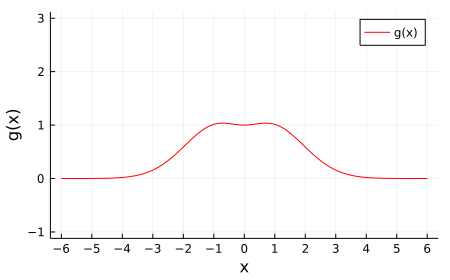

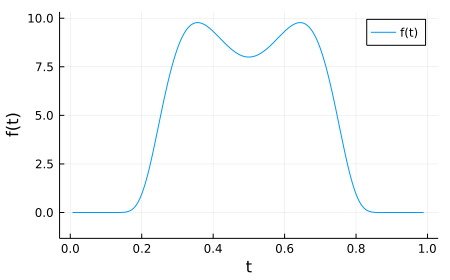


(process:17232): GLib-GIO-WARNING **: 12:42:43.378: Unexpectedly, UWP app `IOForth.VideoConverterMate_1.0.8.0_x64__pxs7cjhtcq1xt' (AUMId `IOForth.VideoConverterMate_pxs7cjhtcq1xt!App') supports 48 extensions but has no verbs


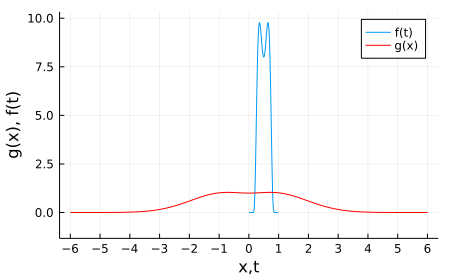

In [1]:
# solution to homwork 1, part I

using Random, Plots, Interact, WebIO

g(x) = exp((-1/3) * (x^2)) * sqrt(1+x^2)
x(t) = (2*t-1) / (t-t^2)                          # variable transformation
J(t) = (2*(t^2)-2*t+1) / ((t^2-t)^2)              # Jacobian

f(t) = g(x(t))*J(t)


plot(g, xticks=-6:1:6, xlim=[-6,6], ylim=[-1,3], size=(450, 280), 
     label="g(x)", xlabel="x", ylabel="g(x)", linecolor= :red) |> display


plot(f, xticks=0:0.2:1, xlim=[0,1], ylim=[-1,10], size=(450, 280), 
     label="f(t)", xlabel="t", ylabel="f(t)") |> display


plot!(g, xticks=-6:1:6, xlim=[-6,6], ylim=[-1,10], size=(450, 280), 
     label="g(x)", xlabel="x,t", ylabel="g(x), f(t)", linecolor = :red) 

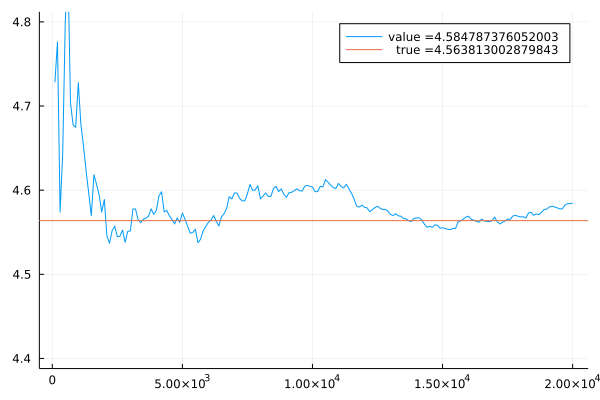

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["grid"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
100, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000dd23270, Task (runnable) @0x000000000dd23270), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",

In [18]:
# solution to homework 1, part II

g(x) = exp((-1/3) * (x^2)) * sqrt(1+x^2)
x(t) = (2*t-1) / (t-t^2)                          # variable transformation
J(t) = (2*(t^2)-2*t+1) / ((t^2-t)^2)              # Jacobian

f(t) = g(x(t))*J(t)

every = 100
n_end = 20000

n_start = every

res_Rand = zeros(Int((n_end-n_start)/every) + 1)

for n in n_start:every:n_end             # better use RNG
    draw_list = rand(Xoshiro(123), n)    # short-hand for rand(Uniform(0,1), n)
    # draw_list = rand(n)                # this has chatters; inferior. Why?
    res = sum(f.(draw_list)) / n
    res_Rand[Int((n-n_start)/every) + 1] = res
end

n = [n_start:every:n_end;]
plot(n, res_Rand, ylimit=[4.4, 4.8], label="value =$(res_Rand[end])") 
hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") |> display


allgrids = Int(n_end/every)

@manipulate for grid in 1:allgrids 
    n1   = n[1:grid]  # the max of grid is allgrids
    res1 = res_Rand[1:grid]
    plot(n1, res1, ylimit=[4.4, 4.8], label="value =$(res1[end])")
    hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843")
end

In the above example of naive Monte Carlo integration, we use random sampling for a Uniform(0,1) distribution. Is this the most *efficient* approach to calculate the sample mean? Here, by *efficient* we meant using fewer draws (smaller $n$) to estimate the population mean with good accuracy and small variance. It turns out that the uniform random sampling is easy but inefficient. It has at least two short-comings.

- The function $g(x)$ or $f(t)$ most likely does not have a uniform profile. Instead, the volume of the integrand is likely to concentrate in one or a few regions in the domain. A uniform sampling would draw the same amount of samples from important regions as well as in regions where they contribute almost nothing to the integral, which is inefficient. (Example: In the homework, the regions less than 0.1 or larger than 0.9 have essentially zero volume for $f(t)$.) A more efficient algorithm should draw more samples from important regions and less from unimportant regions. This is the idea behinds the _**importance sampling**_. 
    - "*If we draw more from a particular region and less from others, does it bias the mean estimate?*" No, it doesn't. The sampling probability would account for that. 


- Even if we decide to uniformly scan through the $(0,1)$ domain without concentrating on a particular region, we could use better strategies to have samples quickly and evenly covering the region. Put in another way: The uniform sampling relies on large number to ensure evenness, but there are ways to achieve evenness without drawing as many samples. One of the strategies, which is particularly advantageous in low dimensional integrations, is to use the low discrepancy sequences in sampling. This approach is called the _**quasi-Monte Carlo integration**_. A topic we now turn to.

## Quasi Monte Carlo Integration

As we mentioned, naive Monte Carlo sampling while easy to do is inefficient. The inefficiency means that we need to use a lot more draws (hence more computational time) to have the sample average converging to the population mean and have small sample variance.

It turns out that, *at least for low dimensional integrations*, there are more efficient ways to compute the integration. For instance, since the goal of the naive Monte Carlo integration is to sample the domain densely and evenly, we do not have to rely on the randomness of a uniform distribution. In fact, simply taking numbers from an evenly spaced grid on $[0,1]$ would be more efficient. The other popular approach is to use numbers from _**low discrepancy sequences**_ (LDS). As the name suggests, numbers in the sequence are relatively (though not exactly) evenly spaced from each other (*low discrepancy*) which is a property *similar* to the grid method. However, compared to the grid method, the LDS has some added properties that makes it more powerful and practical in applications. 

The Monte Carlo integration using the LDS is called quasi-Monte Carlo integration.

### Low Discrepancy Sequences (LDS)

Low discrepancy sequences are also referred to as quasi-random numbers. (Recall that the random numbers we normally use are called *pseudo*-random numbers.) However, the term is misleading because, as you will see, there is nothing random about the LDS. In fact, LDS is a deterministic sequence of numbers.

The mathematic definition of discrepancy is quite specific and involved. Intuitively, discrepancy measures the deviation from uniformity of a sequence of points in $D=[0,1]^s$ where $s$ is the number of dimensions. A low discrepancy sequence would have points where the distances between them are relatively similar (*low discrepancy* or *equidistant*). There are no points clustering together. As a result, a LDS would cover the unit cube as evenly as possible by reducing gaps and avoiding clustering. Another way to put it is that if $X$ has the property of low discrepancy, a subset of the domain/design space/sample area should contain a fraction of points proportional to the subset's volume. It fills the subset "efficiently".



The LDS is not random by design; it is generated from equations and formulas. (Well, even the pseudo-random numbers are also generated algorithmically, but you know what I meant.) We can use the sequence to approximate the integral by a discrete average, which is similar to the Monte Carlo method. We introduce the popular Halton sequence below. 

### The Halton Sequence

The LDS is often used in multi-dimensional spaces. Here for illustration purposes we use the one-dimensional case as an example. The Halton sequence is constructed using prime numbers as the base. For example, if we choose `2` as the base, the sequence is constructed by diving the interval $(0,1)$ in $2^1$, then in $2^2$, $2^3$, ..., etc.. So the first few points would be generated from the following sets:
- $\{1/2\}$,
- $\{1/4, 2/4, 3/4\}$,
- $\{1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8 \}$.

Taking the union of the numbers, we have the first 7 (or, $2^3-1$) base-2 Halton points as 
- $\{1/2, 1/4, 3/4, 1/8, 3/8, 5/8, 7/8 \}$. 

We could increase the length of the sequence by adding the list of $\{1/(2^4), 2/(2^4), \ldots, \}$, and the total number of points would be $2^4-1$.

Similarly, the first few points of the base-3 Halton sequence consist of
- $\{1/3, 2/3\}$, 
- $\{1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9\}$, 
- $\{1/27, \ldots, 26/27\}$. 

Taking the union of the numbers, we have a total of 26 (or, $3^3-1$) base-3 Halton points as 
  - $\{1/3, 2/3, 1/9, 2/9, 4/9, 5/9, 7/9, 8/9, 1/27, 2/27, 4/27, 5/27, 7/27, 8/27, 10/27, 11/27, 13/27, 14/27, 16/27, 17/27, 19/27, 20/27, 22/27, 23/27, 25/27, 26/27 \}.$ 

We could increase the length of the sequence by adding the list of $\{1/(3^4), 2/(3^4), \ldots, \}$, and the total number of points would be $3^4-1$.

_**Why using different primes? Why not use the base-2 sequence for everything?**_ We need to use different primes as the base numbers when we need to generate multiple sequences for a multi-dimensional (D>1) integration problem. For instance, if the integration problem has two dimensions, we could use the prime number of `2` and `3` to generate base-2 and base-3 sequences, one for each of the dimension. If the number of dimensions is three, then we could use prime numbers `2`, `3`, and `5` to generate three sequences. We don't use the same, single sequence for multi-dimensional problems, because it leads to perfect correlations between the sequences in the dimensions, and as a result the space will not be evenly filled. We'll see a graph demo later. In fact, to fill the space evenly, we need the sequences to be as uncorrelated to each other as possible. That's also the reason why we use the *primes* as the base numbers: Primes minimize overlapping.
> Note that when the number of dimensions is large, it's likely we are going to use a large prime number. The large prime number has some undesirable properties, as we'll see very soon.

It is interesting to observe the "gap filling" property of the Halton sequence. To see this, note that for the base-2 sequence, the first set of point is $1/2$ which divides the $(0,1)$ line in half with equal lengths, and the second set contains points of $1/4$ and $3/4$ which fills the "gaps" in $(0,1/2)$ and $(1/2, 1)$ and creates four equal-length segments. Similarly, the third set of points would fill each of the gaps created by the previous points. In other words, the gaps are *sequentially* filled in a way that leads to a set of points densely and evenly distributed in $(0,1)$.

Other LDSs (e.g., the Sobol sequence and its variants) also have the gap filling property, although they work in different ways.

The gap-filling behavior has implications on Halton sequences. What we are going to discuss below may be summarized by saying that the (Halton and Sobol) sequences have good uniformity of the low-order (low-dimensional) projections and/or of the earlier dimension projections. In layman's words: Those sequences are good if you use smaller primes (low-dimensional) and use the earlier parts of the sequence. Here is the explanation. See also Wang and Sloan (2003).

- **Halton Sequences using Large Prime Numbers Are Not Good:** In general, we do not like to use large primes to generate Halton sequences, particularly when the desired length of the sequence is not large. Take for example the case of using `47` as the prime. The first set of the points uses $47^1$ as the divisor and it contains a large amount of points (to be exact, 46 of them: $1/47$, $2/47$, ... $46/47$) before it completes the cycle. Only then, when it moves to the second set with the divisor $47^2$, the gap-filling action begins to take place. In comparison, the base-2 sequence has the gap-filling action started early in the sequence. Therefore, if our desired length of the Halton sequence is 25, the base-47 sequence would have points $\{1/47, 2/47, \ldots, 25/47 \}$ which cover only about the first half of the $(0,1)$ line while the base-2 sequence would have much even coverage on $(0,1)$.


- **Latter Segments of Long Halton Sequences Are Not Good:** That is, even if you use `2` as the prime, the Halton would use $2^2$, $2^3$, $\ldots$, $2^n$ as the divisor sequentially for long sequences. If $n$ is large, then exactly the same problem we discussed above would arise.

In [3]:
# Show the gap filling property. For large prime (47), the property does not work well.

using HaltonSequences

totallength = 1000
picklength  = 30

@manipulate for prime = (2,3,5,7,11,13,47), thebeg = 1:10:totallength-picklength+1, theend = 2:totallength

    allseq = Halton(prime, length=totallength)
    
    xvar = allseq[thebeg:theend]
    yvar = ones(length(xvar))
    plot(xvar, yvar, seriestype = :scatter, xlim = [0, 1], ylim=[0.5, 1.2], size=(800, 300),
         markersize=4, label="prime=$(prime), length: $(thebeg) to $(theend)")
    lens!([0.90, 1.0], [0.9, 1.1],  inset = (1, bbox(0.1, 0.2, 0.7, 0.2, :bottom, :left)),
    subplot=2, framestyle=:box, lw=4, ls=:dot, lc=:orange)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["prime"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "2", "val" => 1, "id" => "idV2ClB0rU"), OrderedDict{String, Any}("key" => "3", "val" => 2, "id" => "idhDrJBX6N"), OrderedDict{String, Any}("key" => "5", "val" => 3, "id" => "id4tjwkunp"), OrderedDict{String, Any}("key" => "7", "val" => 4, "id" => "idpdnnrOUd"), OrderedDict{String, Any}("key" => "11", "val" => 5, "id" => "id7dlfMn6L"), OrderedDict{String, Any}("key" => "13", "val" => 6, "id" => "idmJGQdMQG"), OrderedDict{String, Any}("key" => "47", "val" => 7, "id" => "idfiUZ2d2g")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000078ef7650, Task (runnable) @0x0000000078ef7650), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n             

In [4]:
# Show that larger primes have poor uniformity.
# Show that even for small primes, the latter segments (e.g., last 30) have poor uniformity.

using HaltonSequences
picklength = 30
totallength= 10000

@manipulate for prime = (2,3,5,7,11,13,47), thebeg = 1:10:totallength-picklength+1    

    allseq = Halton(prime, length=totallength)  
    theend = thebeg + picklength - 1
    
    xvar = allseq[thebeg:theend] 
    yvar = ones(picklength)
    
    plot(xvar, yvar, seriestype = :scatter, xlim = [0, 1], ylim=[0, 2], size=(700, 200),
         markersize=3, label="prime=$(prime), length: $(thebeg) to $(theend)")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["prime"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "2", "val" => 1, "id" => "idohZRELkT"), OrderedDict{String, Any}("key" => "3", "val" => 2, "id" => "idujnfcxXn"), OrderedDict{String, Any}("key" => "5", "val" => 3, "id" => "id3rq9p6eH"), OrderedDict{String, Any}("key" => "7", "val" => 4, "id" => "id0FVKRx7q"), OrderedDict{String, Any}("key" => "11", "val" => 5, "id" => "idfz942SOi"), OrderedDict{String, Any}("key" => "13", "val" => 6, "id" => "idPenyqqnB"), OrderedDict{String, Any}("key" => "47", "val" => 7, "id" => "id6jjNCw21")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000077e41940, Task (runnable) @0x0000000077e41940), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n             

A few finer points (pun intended) here:
- To have a more or less *complete* set of points that would cover the $(0,1)$ evenly, we should, theoretically, choose the length of the sequence equal to $b^n-1$ where $b$ is the base number. For instance, if we choose $b=2$ to construct the sequence, we could choose the length equal to $2^3-1=7$, so that the points would cover $(0,1)$ more evenly. You may see what would happen if we choose the length of 5: we miss $5/8$ and $7/8$. Very few articles talked about this, and the reasons may be (1) If the length is large such as in the hundreds, this detail might not be as important. (2) In the case of multi-dimensionality, it is impossible to have complete sets on all the dimensions; we'll see why very soon. 


- The order of the numbers appearing in the sequence may or may not be important. That is, we are talking about, for instance, $\{1/4, 2/4, 3/4\}$ vs. $\{1/4, 3/4, 2/4\}$. If we observe the $b^n-1$ rule and always construct a complete sequence, then the order does not matter for the one-dimensional case. It is because no matter how you arrange the numbers, they'll all show up in the set. However, if the $b^n-1$ rule is not followed and we always pick up an arbitrary length of the sequence, then we might want to order the number in a symmetric way. For instance, we may want to order the numbers as in $\{1/9, 8/9, 2/9, 7/9, 3/9, 6/9, 4/9, 5/9 \}$. This way, we avoid having more points toward one end of the sequence when it is truncated. In fact, some of the computer routines would produce the sequence this way.

The gap-filling property also contributes to another desired property of the LDS: the additivity (need to check the terminology). That is, given a LDS of length $n$, any subset of the sequence of length $m\leq n$ would itself be a LDS. Or, given a length-$n$ LDS, adding another $m$ points to the original sequence would still be a LDS. 

In practice, the LDS's additivity is an important characteristic that tells it apart from the grid-method based sequences. It is best illustrated using an example. Consider a grid sequence "A" and a Halton base-2 sequence "B"; both are of length 7:
- A = $\{1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8\}$,
- B = $\{ 1/2, 1/4, 3/4, 1/8, 5/8, 3/8, 7/8 \}$.

If we take a subset from both of them with length=3, we have
- A1 = $\{1/8, 2/8, 3/8\}$,
- B1 = $\{ 1/2, 1/4, 3/4\}$.

Clearly, B1 is more evenly spaced in $(0,1)$ than A1 is.

This property has an important advantage in practice: Suppose we drew $n$ points from the sequences to approximate an integration, only realized later that $n$ is not enough and we need to use $p$ $(>n)$ points. For the grid-based method, we need to re-calculate the grid and re-evaluate all of the $p$ points on the function. For the LDS, we could keep all the existing $n$ points and only evaluate the additional $p-n$ points. This could be helpful in speed-critical missions.

An even more important property of the LDS, however, is when it is applied to multi-dimensional problems. A topic we now turn to.

A multi-dimensional Halton sequence is one that pairs the points from different-base-number generated sequences. For instance, if we construct a two-dimensional Halton sequence using base number $2$ and $3$, we could have: $\{(1/2, 1/3), (1/4, 2/3), (3/4, 1/9), (1/8, 4/9), (5/8, 7/9), (3/8, 2/9), (7/8, 5/9)\}$. Note that I have re-arranged the sequences to make them more or less *symmetric* before doing the pairing. 

In the case of multi-dimensional, people usually draw Halton sequences with sequential prime numbers. That is, use primes (2,3) for 2-D, (2,3,5) for 3-D, (2,3,5,7) for 4-D, etc.. Though it does not have to be this way. It's perfectly fine to use (2,5) for 2-D, for example.

The multi-dimensional Halton sequence has a well-know problem, which is that the first few points from different prime-based sequences tend to correlated with other. The problem is particularly salient for higher dimensional sequences. For instance, the first few points from base-7 and base-11 sequences are very obvious. (We'll use a graph to demonstrate the problem.) We do not like the correlation in the LDS, because it introduces unwanted correlations to the objective functions (e.g., Mary's and John's likelihood of taking bus to school today). Avoiding correlation is also the reason that we use prime numbers to construct the Halton sequence to begin with. If they are not primes, two Halton sequences will overlap at a predictable frequency.


There are some ways to reduce the problems associated with the high-dimensional Halton sequences, but they are far from satisfactory:
- Cut off the first few points. It is because the correlation tends to be particularly strong in the first few points.
- Jump the primes. For instance, sequences from primes (2,11) would be fine (though sequences from primes (7,11) is problematic).
  - However, this approach has a limit, because if we continue to skip primes we'll quickly find ourselves using large primes (e.g., 47). But Halton sequence with large primes is itself problematic. It's intuitive to understand why: The sequence would be $\{1/47, 2/47, \ldots, 46/47, \}$, $\{1/(47^2), 2/(47^2), \ldots \}$. You see, it moves very slowly and takes long to complete a unit circle, and so the length of the sequence needs to be very large in order to have a good, even coverage on $(0,1)$.  We'll draw a graph to demonstrate the problem.

To deal with the problem of correlations between Halton sequences in high-dimensional cases, a better solution is to randomize (in some sense) the sequences. In the literature, it is called generalized Halton or scrambled Halton sequences. Details of which shall be left to advanced courses.

Julia provides packages to produce Halton sequence.

In [5]:
using HaltonSequences
Halton(2, length=7) |> display       # base=2, length=7
HaltonPoint(2, length=7) |> display  # dimension=2, length=7; base is the the default (2,3)

7-element Halton{Float64}:
 0.5
 0.25
 0.75
 0.125
 0.625
 0.375
 0.875

7-element HaltonPoint{Float64}:
 [0.5, 0.3333333333333333]
 [0.25, 0.6666666666666666]
 [0.75, 0.1111111111111111]
 [0.125, 0.4444444444444444]
 [0.625, 0.7777777777777777]
 [0.375, 0.2222222222222222]
 [0.875, 0.5555555555555556]

The following graph shows how a 2-D Halton sequence fills the space.

<div>
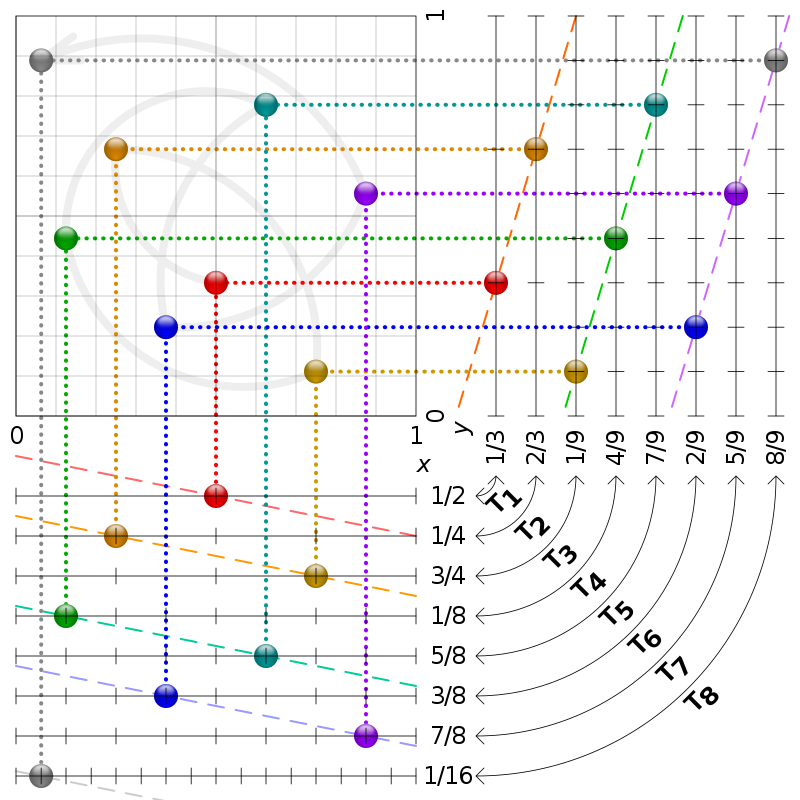
(source: wikipage)
</div>




Let's see the 3-D case.

In [6]:
# change `mybegin` to show that any subset is equdistant

@manipulate for mylength=1:2000, angle1=45:90, angle2=45:90, mybegin=1:500
    x1 = Halton(2, length=mylength)[mybegin:end]
    y1 = Halton(3, length=mylength)[mybegin:end]
    z1 = Halton(5, length=mylength)[mybegin:end]
    # gh1 = plot(x1, y1, z1, seriestype=:scatter, markersize=4, camera=(angle1, angle2))
    scatter(x1, y1, z1, markersize=4, camera=(angle1, angle2))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["mylength"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 2000, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
1000, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000080666ca0, Task (runnable) @0x0000000080666ca0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\

In [7]:
# problems with large prime: move very slow to cover the unit circle, and so the length needs to be large

Halton(47, length=200)[150:160,1] |> display
Halton(47, length=200)[1:10,1]

11-element Vector{Float64}:
 0.19284744228157538
 0.21412403802625624
 0.2354006337709371
 0.2566772295156179
 0.27795382526029877
 0.2992304210049796
 0.3205070167496605
 0.3417836124943413
 0.36306020823902213
 0.384336803983703
 0.40561339972838384

10-element Vector{Float64}:
 0.02127659574468085
 0.0425531914893617
 0.06382978723404255
 0.0851063829787234
 0.10638297872340426
 0.1276595744680851
 0.14893617021276595
 0.1702127659574468
 0.19148936170212766
 0.2127659574468085

In [8]:
# Does Halton sequence really produce a more evenly spaced sampling point?
# Also show that the first few Halton points may be correlated, so need to get rid of some.

# show the correlation from prime1=7,prime2=11 
# show the correlation reduced by prime1=2,prime2=11
# show odd behavior if prime2=47
# show better performance of generalzied Halton

using Random, Plots, RCall

prime1, prime2 = 2, 11   # (2,3) looks ok, (7,11) looks bad, (2,11) looks ok. Lesson: for high dimensions, not good, even if cutting off the first few obs there is still strong corr
mylength = 500
    
Random.seed!(1234)  
   # random; pre-generate long sequences
a1 = rand(500)
b1 = rand(500)      

   # Halton
a2 = Halton(prime1, length=500)
b2 = Halton(prime2, length=500)

   # generalized Halton
reval("suppressMessages(suppressWarnings(library(qrng)))")  # load `qrng` package in R
ab3 = rcopy(R"set.seed(271); ghalton(n=$(mylength), d=5, method=c(\"generalized\") )")[:,4:5]  # get dim=5 and keep only dim=4,5


@manipulate for mybeg=1:mylength, myend=2:mylength    # choose the length of the sequence
    ph1 = scatter(a1[mybeg:myend], b1[mybeg:myend], label="Random")
    ph2 = scatter(a2[mybeg:myend], b2[mybeg:myend], label="Halton")    
    ph3 = scatter(ab3[mybeg:myend, 1], ab3[mybeg:myend, 2], label="gHalton" )
    plot(ph1, ph2, ph3)
end    


## Homework: Instead of using `rand`, use grids instead. Try your best to have a "nice" coverage.


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["mybeg"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 500, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
250, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007a645f10, Task (runnable) @0x000000007a645f10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\"

###  Homework 2
####  Let's redo the integration problem using Halton sequence:
  $$\begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}$$ 
- Use Monte Carlo integration (via LDS) to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw Halton sequence from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.

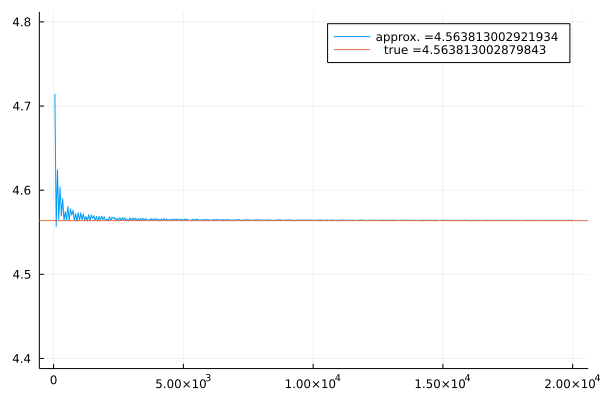

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["grid"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 400, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
200, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007ab3c3f0, Task (runnable) @0x000000007ab3c3f0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",

In [9]:
# Solution to HW2

using Distributions, HaltonSequences

g(x) = exp((-1/3) * (x^2)) * sqrt(1+x^2)
x(t) = (2*t-1) / (t-t^2)                          # variable transformation
J(t) = (2*(t^2)-2*t+1) / ((t^2-t)^2)              # Jacobian
f(t) = g(x(t))*J(t)

every = 50
n_end = 20000

n_start = every
res_Halton = zeros(Int((n_end-n_start)/every) + 1)

hpt = Halton(2, length=n_end)

for n in n_start:every:n_end                   
    res = sum( f.(hpt[1:n]) ) / n
    res_Halton[Int((n-n_start)/every) + 1] = res
end


n = [n_start:every:n_end;]
plot(n, res_Halton, ylimit=[4.4, 4.8], label="approx. =$(res_Halton[end])") 
hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") |> display

allgrids = Int(n_end/every)

@manipulate for grid in 1:allgrids 
    n1   = n[1:grid]  # the max of grid is allgrids
    res1 = res_Halton[1:grid]
    plot(n1, res1, ylimit=[4.4, 4.8], label="approx. =$(res1[end])")
    hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") 
end




## Importance Sampling

> The use of importance sampling can be roughly categorized into two scenarios:
> - The integrand does not have the variable's density function. If we know (via observation, for example) where most of the integrand's volume comes from, we could use a sampling function that draws more heavily from those regions in order to better efficiency.
> - The integrand includes the variable's density function (so we could draw the samples accordingly). However, it may be difficult to draw samples from such a distribution, and we want to have an alternative sampling function which is easier and perhaps also more efficient to do the sampling.



Let's first recall from the basic statistics that in order to calculate the expected value of a function $h(x)$ where $x\in X$ is a random value, we need to have the probability function of $x$, i.e., $p(x)$. That is, $\int_a^b h(x)p(x) dx = E[h(X)]$.

Now, recall also that the Monte Carlo integration involves taking expectations on a function. The interesting part is that, although the integrand may not already have a density function there, we could assign one for it so that the integration can still be expressed by expectations. To wit, recall the first example we have in the lecture:

$$\begin{aligned}
I = \int_a^b g(x) dx =  \int_a^b \frac{g(x)}{p1(x)} p1(x) dx = (b-a) \int_a^b g(x) p1(x) dx = (b-a) E[g(X)],
\end{aligned}$$

where $p1(x)  = \frac{1}{b-a}$ for $x \in (a,b)$. In this example, $g(x)$ is not necessarily itself a density function, and we assign $p1(x)$ to it as the density function with an appropriate adjustment on the volume ($b-a$). 


It should be noted that the assigned density function does not have to be a uniform distribution. We could choose different density functions for $g(x)$. In order to avoid confusion, we'll adopt new notations here: $I = (b-a) E_{p1}[g(X)]$ where the subscript indicates that the expectation is calculated using $p1(x)$ as the density function.

Given $p1(x)$ is a uniform distribution, it means that the occurrence of $x$ is assumed to be equally likely for all values in the domain. The assumption may be naive, because the value of $g(x)$ may mostly come from a particular region in the domain, and if we could we should sample more heavily in that region and lightly in other region in order to be more efficient in sampling.

For instance, if we know $g(x)$ is the largest around $x=3$, we could use a _**normalized**_ normal distribution (or, a truncated normal distribution) with the mean equal to $3$ as the density function, which will draw more samples from $x$ around $3$ and less samples elsewhere. Call this density function $p2(x)$ which is normalized such that  $\int_a^b p2(x) dx =1$. We then have

$$\begin{aligned}
I = \int_a^b g(x) dx = \int_a^b \frac{g(x)}{p2(x)} p2(x) dx = E_{p2}[f(X)],
\end{aligned}$$

where $f(x) = [g(x)/p2(x)]$. Finally,

$$\begin{aligned}
I = \int_a^b g(x) dx = E_{p2}[f(X)] \approx \frac{1}{n}\sum_i^n f(x_i),
\end{aligned}$$

where $x_i$ is drawn from $p2(x)$. Here, $p2(x)$ is often called a _**proposal distribution**_ or _**sampling distribution**_.

The above is an example of importance sampling. A good choice of $p2(x)$ provides better sampling, which results in reduced variance and faster convergence. Therefore, importance sampling is often referred to as a variance reduction method.

If the original integration problem has a density function, we could still apply the same principle to it. Consider for example the problem

$$\begin{align}
I = \int_a^b g(x) q(x) dx,
\end{align}$$

where $q(x)$ is the density function of $x$. Without applying the importance sampling technique, we could do the Monte Carlo integration by drawing $x_i$ from $q(x)$, calculating $g(x_i)$, and then 

$$\begin{align}
I = E_{q}[g(x)] \approx (1/n) \sum_i^n g(x_i).
\end{align}$$

Although the procedure looks straightforward, in practice we may still run into problems when sampling from $q(x)$ is difficult. In such cases, we may apply the importance sampling technique to change the sampling function. For instance,

$$\begin{aligned}
I = \int_a^b g(x)q(x) dx = \int_a^b \frac{g(x)q(x)}{p3(x)} p3(x) dx = E_{p3}[f(X)],
\end{aligned}$$

where $f(x) = [g(x)q(x)/p3(x)]$, and $p3(x)$ is a normalized density function ($\int_a^b p3(x)dx=1$) and is supposed to be easier and perhaps more efficient to do sampling from. To approximate the integral, we sample $x_i$ from $p3(x)$ (instead of $q(x)$), calculate $f(x_i)$, and  

$$\begin{align}
I = E_{p3}[f(X)] \approx (1/n) \sum_i^n f(x_i). 
\end{align}$$

The sampling distribution (i.e., $p2(x)$ and $p3(x)$) is not necessarily the exact true distribution of $x$ and is in fact likely to be a biased distribution to $x$. So, would using it bias the estimate? No, it wouldn't. It is because the sampling is weighted to correct for the use of the biased distribution, and the correction ensures that the estimator is unbiased. The weight is given by $q(x)/p3(x)$ which is called the _**likelihood ratio**_. 


Choosing good proposal distributions of $p2(x)$ and $p3(x)$ are vital. It gives a simpler expression and efficient sampling. Some wisdoms from the literature (using our last example to illustrate):
- select a $p3(x)$ which comes from the same family of $q(x)$ so that they have similar shapes;
- $p3(x)$ should have thicker tails than $q(x)$, otherwise $f(x)=g(x)q(x)/p3(x)$ may get too large and become unbounded upward;
- $p3(x)$ should be easy to do sampling from.




In the multi-dimensional case, if we choose **truncated normal** to be $p3(x)$, then it is the **GHK simulator**. See `(Benz Bretz 2009) Computation of Multivariate Normal and t Probabilities.pdf`.




### Other Remarks

- GHK simulator is a kind of importance sampling where it uses a truncated normal as the probability function. See also `(Gates 2006 SJ) A Mata Geweke-Hajivassiliou-Keane Multivariate Normal Simulator.pdf`.



## Comparisons
|                  | Gauss-Quadratures                                                                                  | Adaptive Quadratue                                             | Monte Carlo                                                          | Quasi Monte Carlo                                                                                        |
|------------------|----------------------------------------------------------------------------------------------------|----------------------------------------------------------------|----------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| where            | hand-made                                                                                          | Julia' QuadGK                                                  | hand-made                                                            | hand-made                                                                                                |
| feature          | G-Legendre, G-Hermite, G-Laguerre                                                                  | G-Legendre + G-Kronrod                                         | random draw from [0.1]                                               | low discrepancy sequences:  Halton, Sobol, etc.                                                          |
| stochastic       | No                                                                                                 | No                                                             | Yes                                                                  | No                                                                                                       |
| convergence rate | very good for 1D problems; but  has the curse of dimensionality                                    | very good for 1D problems; but has the curse of dimensionality | $1/\sqrt{N}$                                                         | $1/N$                                                                                                    |
| availability        | 5/10. Some packages do not have  any; some provide only the GH rules  but not others (e.g., Stata) | 2/10. Quite rare.                                              | 10/10. Don't require specialized routines. You can do it with Excel. | 3/10. Some packages do not have any. Some  provide only the basic sequence such as the  Halton sequence. |

## Multi-Dimension Problems and the Curse of Dimensionality

So far we learned several numerical integration methods: the Gauss quadrature method, the Monte Carlo method, and the quasi-Monte Carlo method. Each method has its own strength, though it is generally agreed that for one-dimensional problems the quadrature-based methods have clear advantages (fast and accurate). However, for multi- and high-dimensional problems, the (quasi-)Monte Carlo methods are often the only feasible choices. We will use examples to show why this is the case. Before that, let's see how we might extend the one-dimensional quadrature rules to multi-dimensional problems.


Consider the following problem of the Gauss-Legendre type:

$$\begin{aligned}
I = \int_{-1}^1 f(x,y)dx dy.
\end{aligned}$$

To use the GL rules, we may first integrate only $y$:

$$\begin{aligned}
 \int_{-1}^1 f(x,y) dy \approx \sum_{i=1}^n \omega_i f(x, \xi_i).
\end{aligned}$$

Then we integrate $x$ as well:

$$\begin{aligned}
 I=\int_{-1}^1 f(x,y) dx dy \approx \sum_{j=1}^n \sum_{i=1}^n \omega_j \omega_i f(\xi_j, \xi_i).
\end{aligned}$$

The above approach is called the (tensor) product rule. The problem of this approach, however, is that the number of quadrature points grows exponentially with the number of dimensions. That is, for a D-dimensional integration, the number of required points is $n^D$. Also, for fixed dimensions ($D>1$) the number of quadrature points also increases exponentially if the desired precision is increased. The issue is referred to as the *curse of dimensionality*. 

### A 3-dimensional integration problem.

\begin{align}
 I = \int_0^1 \left(\frac{1}{x+1} + \sqrt{y} + 2(z)^3\right) dxdydz
\end{align} 

Clearly, `quadgk()` is not applicable here because it only handles 1-D problems. Julia has a package `HCubature.jl` which specialized in multi-dimensional integration using adaptive methods. The following piece of code shows how we may use `HCubature`, products of Gauss-Legendre rules, the quasi-Monte Carlo, and the Monte Carlo methods to calculate the integration.



In [1]:
using HCubature, HaltonSequences, Statistics, FastGaussQuadrature

f(x) = 1/(x[1]+1) + sqrt(x[2]) + 2*x[3]^2


# HCubature

sol_hcubature = hcubature(f, [0,0,0], [1,1,1], rtol=1e-8)[1] 
@show sol_hcubature


# Gauss Quadrature, product rule 
f2(x1,x2,x3) = 1/(x1+1) + sqrt(x2) + 2*x3^2     # for programming convinience

jacob_1 = 1/2                  # let xi = (ti+1)/2 (change damain to [-1,1])
jacob_2 = 1/2
jacob_3 = 1/2
inte(t1,t2,t3) = f2((t1+1)/2, (t2+1)/2, (t3+1)/2)*jacob_1*jacob_2*jacob_3

m=30

xi, w = gausslegendre(m)
inte_2(t2,t3) = sum(w.*inte.(xi,t2,t3))       # integrate out t1
inte_3(t3) = sum(w.*inte_2.(xi,t3))           # integrate out t2
sol_GLegendre = sum(w.*inte_3.(xi))           # integrate out t3
@show sol_GLegendre
# Ask: How many points are used in the computation? 30^3 = 27_000

# Quasi Monte Carlo (Halton)
n = m^3
halton_3d = HaltonPoint(3, length=n)
sol_qMC_halto = mean(f.(halton_3d)) 
@show sol_qMC_halto


# Monte Carlo
n = m^3
random_3d = rand(3, n)
random_3d = collect(eachcol(random_3d))
sol_mc_random = mean(f.(random_3d))
@show sol_mc_random

sol_hcubature = 2.0264805140089472
sol_GLegendre = 2.0264841447030766
sol_qMC_halto = 2.02629256650554
sol_mc_random = 2.022993188358717


2.022993188358717

The above results indicate that, for low-dimensional (3D) problems, the product rule of the Gauss-Legendre is still feasible and good. What if we keep going up on the dimensions? Let's consider a 5D integration problem as follows.

### A 5-dimensional integration problem

\begin{align}
 I = \int_0^1 \left(\frac{1}{x+1} + \sqrt{y} + 2(z)^3 + \sqrt{2 p} +  q^{1/3}\right) dxdydzdpdq
\end{align} 



In [2]:
using HCubature, HaltonSequences, Statistics, FastGaussQuadrature

f(x) = 1/(x[1]+1) + sqrt(x[2]) + 2*x[3]^2 + sqrt(2*x[4]) + cbrt(x[5])


# HCubature
sol_hcubature = hcubature(f, [0,0,0, 0,0], [1,1,1,1,1], rtol=1e-8)[1] 
@show sol_hcubature


# Gauss Quadrature, product rule 
f2(x1,x2,x3,x4,x5) = 1/(x1+1) + sqrt(x2) + 2*x3^2 + sqrt(2*x4) + cbrt(x5)     # for programming convinience

m=30
xi, w = gausslegendre(m)
jacob_1 = 1/2                  # let xi = (ti+1)/2 (change damain to [-1,1])
jacob_2 = jacob_3 = jacob_4 = jacob_5 = 1/2
inte(t1,t2,t3,t4,t5) = f2((t1+1)/2, (t2+1)/2, (t3+1)/2, (t4+1)/2, (t5+1)/2)*jacob_1*jacob_2*jacob_3*jacob_4*jacob_5
inte_2(t2,t3,t4,t5) = sum(w.*inte.(xi,t2,t3,t4,t5))       # integrate out t1
inte_3(t3,t4,t5)    = sum(w.*inte_2.(xi,t3,t4,t5)) 
inte_4(t4,t5)       = sum(w.*inte_3.(xi,t4,t5))          
inte_5(t5)          = sum(w.*inte_4.(xi,t5))
sol_GLegendre       = sum(w.*inte_5.(xi))                
@show sol_GLegendre
# Ask: How may points were used in the evaluation? 30^5 = 24_300_000


# Quasi Monte Carlo (Halton)
n = m^5
halton_3d = HaltonPoint(5, length=n)
sol_qMC_halto = mean(f.(halton_3d)) 
@show sol_qMC_halto


# Monte Carlo
n = m^5
random_5d = rand(5, n)
random_5d = collect(eachcol(random_5d))
sol_mc_random = mean(f.(random_5d))
@show sol_mc_random


sol_hcubature = 3.7192895557617027
sol_GLegendre = 3.719309923942772
sol_qMC_halto = 3.7192887100128935
sol_mc_random = 3.719118400166432


3.719118400166432

As you can see, with the same amount of random draws for various algorithms, the advantage of Gauss-Lengendre disappers when D goes up.

## Some Remarks


### On Convergence Rates

- It can be shown that the expected error of the Monte Carlo integrator is $\sigma(g)/\sqrt{n}$ where $\sigma^2(g)$ denotes the variance of $g(\cdot)$ function. So, the error is proportional to $1/\sqrt{n}$ which is the MC method's convergence rate. Therefore, if we want to reduce the error by half, we need to quadruple the number of random draws. Or, if you to gain an extra decimal of accuracy, you will need 100 times more points! It is very slow.


- The rate of convergence using the LDS is $1/n$, so it may be superior to the Monte Carlo methods. However, some research finds that this advantage decreases with increasing dimensions. 


- We as practitioners often care about the converge rate of the various estimators: how quickly the estimate converges to the true value. If an estimator has a quick converge rate, small $n$ should suffice which reduces the computational burden.


- Quadrature methods have very good convergence rate for one-dimensional problems. However, the convergence rate deteriorates quickly as we move to higher dimension problems. This is called the *curse of dimensionality*.


- The Monte Carlo method is different. Although it does not converge as quickly in one-dimensional problems, the convergence rate is independent of the number of dimensions in the integral. Therefore, it does not suffer from the curse of dimensionality, and this property makes the Monte Carlo method attractive for multi- and high-dimensional problems.

### On High Dimension Integration

- `(Benz Bretz 2009) Computation of Multivariate Normal and t Probabilities.pdf`


- Some use `quadrature` for 1-D numerical integration and `cubature` for multi-D numerical integration. Some would use `quadrature` to mean all of the numerical integration. In some places, `cubature` may include MC methods and non-MC methods such as the Genz-Malik algorithm.


- The naive Monte Carlo method is easy to implement and may work well for simple problems. However, the Monte Carlo method could really shine (particular in high dimensions) when it is customized to use problem-specific sampling distributions. It is because many if not most of high-dimensional integrands are very localized and small subspace would contribute the most to the integral. Many of the Monte Carlo methods are devoted to developing strategies to do smart sampling.


- (from Wikipage "VEGAS algorithm") The VEGAS algorithm, due to G. Peter Lepage, is a method for reducing error in Monte Carlo simulations by using a known or approximate probability distribution function to concentrate the search in those areas of the integrand that make the greatest contribution to the final integral. The VEGAS algorithm is based on importance sampling. It samples points from the probability distribution described by the function $|f|$, so that the points are concentrated in the regions that make the largest contribution to the integral.



## Julia Resources

- `quadGK.jl`: One-dimensional integration using the method of adaptive quadratures based on the Gauss-Kronrod rule. Pure Julia implementation. All bounds accepted (transform bounds automatically).


- `HCubature.jl`: One- and Multi-dimensional integration. The 1D integration is done by calling `quadGD.jl` and the multi-D integration is done (mainly) using the h-adaptive integration which in turn uses the Genz-Malik rule. Pure Julia implementation. Accept finite bounds (not sure about infinity).
    - See also `Cubature.jl` which provides similar functionality of `HCubature` but not a Julia implementation. It has better explanation regarding algorithms.
    - Some say that for dimensions smaller than 7, `HCubature` works well. For higher dimensions, may need to use Monte Carlo methods.


- `Cuba.jl`: One- and Multi-dimensional integration; providing various Monte Carlo methods (vegas, suave, divonne) and one deterministic cubature-based method (cuhre). A wrapper around the C `Cuba` library. Bounds need to be in $[0,1]$.
- The Cuba library says that `cuhre` uses the cubature rule, which it said is deterministic and is different from MC. But what is cubature rule?

# Other Resources

#### High-dimensional integration using Julia: `HCubature.jl`
- https://docs.juliahub.com/CalculusWithJulia/AZHbv/0.0.5/integral_vector_calculus/double_triple_integrals.html
- The computationally efficient way to perform multiple integrals numerically would be to use hcubature. However, this function is defined only for rectangular regions. In the event of non-rectangular regions, the suggested performant way would be to find a suitable transformation.
- However, for simple problems, where ease of expressing a region is preferred to computational efficiency, the following function, fubini, can be used. 
- The fubini function is defined in terms of iterated uses of the quadgk function, previously used for one-dimensional integrals. The function allows the endpoints to be expressed through a numeric constant or a function of the previous variables. That is, the end points could be a function of the variable to be integrated.
- https://discourse.julialang.org/t/2d-integration-over-non-rectangular-domain-using-cubature/2991/11


- https://web.northeastern.edu/afeiguin/phys5870/phys5870/node73.html

- https://astrostatistics.psu.edu/su14/lectures/cisewski_is.pdf

- https://artowen.su.domains/mc/Ch-var-is.pdf
